In [11]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
%autoreload 2

In [13]:
from data import load_mnist
from utils import get_device
import torch
import vae
from vae import train_vae

In [14]:
train_iter, valid_iter = load_mnist()
num_epochs = 20
x_dim = 28 * 28
# MNIST is 28 x 28
encoder_hidden_layers = [512, 384, 256]
decoder_hidden_layers = [256, 384, 512]
latent_dim = 128

encoder = vae.MLPEncoder(encoder_hidden_layers, latent_dim)
decoder = vae.MLPDecoder(decoder_hidden_layers, x_dim)

lr = 0.0001
net = vae.VAE(encoder, decoder, device=get_device())

device = get_device()
net.to(device)

optimizer = torch.optim.Adam(net.parameters(), lr)
train_vae(net, optimizer, train_iter, valid_iter, num_epochs)

Epoch 0 - Train Loss: 75.92737279296875
Epoch 0 - Valid Loss: 52.370094299316406
Epoch 1 - Train Loss: 52.040814790039065
Epoch 1 - Valid Loss: 51.73026657104492
Epoch 2 - Train Loss: 50.914811376953125
Epoch 2 - Valid Loss: 50.24241256713867
Epoch 3 - Train Loss: 50.06553713867188
Epoch 3 - Valid Loss: 49.6371955871582
Epoch 4 - Train Loss: 49.53485108398438
Epoch 4 - Valid Loss: 49.17577362060547
Epoch 5 - Train Loss: 48.845785239257815
Epoch 5 - Valid Loss: 48.30501174926758
Epoch 6 - Train Loss: 48.117068002929685
Epoch 6 - Valid Loss: 47.877342224121094
Epoch 7 - Train Loss: 47.77334953613281
Epoch 7 - Valid Loss: 47.500370025634766
Epoch 8 - Train Loss: 47.34786331054688
Epoch 8 - Valid Loss: 47.01350402832031
Epoch 9 - Train Loss: 46.7954196484375
Epoch 9 - Valid Loss: 46.421321868896484
Epoch 10 - Train Loss: 46.22219432128906
Epoch 10 - Valid Loss: 45.76610565185547
Epoch 11 - Train Loss: 45.525203173828125
Epoch 11 - Valid Loss: 45.07339859008789
Epoch 12 - Train Loss: 44.599

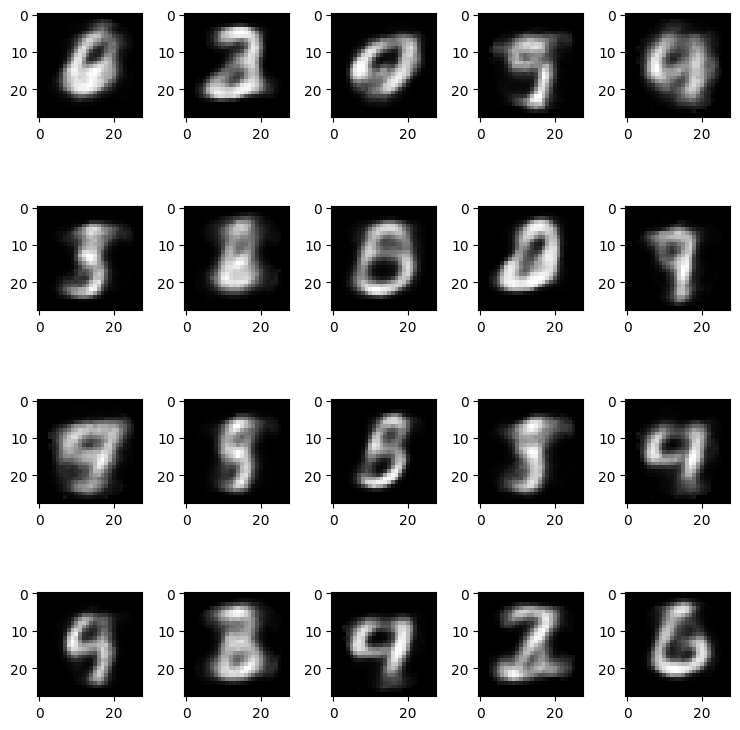

In [15]:
from utils import visualize_out
count = 20
z = torch.randn((count, latent_dim), device=get_device())
out = net.decoder(z)

imgs = out.reshape((count, 28, 28)).cpu().detach().numpy()
visualize_out(imgs)

In [16]:
import cvae
from cvae import train_cvae
cvae_encoder = cvae.ConditionalMLPEncoder(encoder_hidden_layers, latent_dim)
cvae_decoder = cvae.ConditionalMLPDecoder(decoder_hidden_layers, x_dim)
num_epochs = 20
net = cvae.CVAE(cvae_encoder, cvae_decoder)
net.to(device)

optimizer = torch.optim.Adam(net.parameters(), lr)
train_cvae(net, optimizer, train_iter, valid_iter, num_epochs)

Epoch 0 - Train Loss: 76.34161767578125
Epoch 0 - Valid Loss: 52.326438903808594
Epoch 1 - Train Loss: 51.88929455078125
Epoch 1 - Valid Loss: 51.28369140625
Epoch 2 - Train Loss: 50.357973984375
Epoch 2 - Valid Loss: 49.65917205810547
Epoch 3 - Train Loss: 49.120711518554685
Epoch 3 - Valid Loss: 48.02014923095703
Epoch 4 - Train Loss: 47.4555391796875
Epoch 4 - Valid Loss: 46.84077835083008
Epoch 5 - Train Loss: 46.279218818359375
Epoch 5 - Valid Loss: 45.33256912231445
Epoch 6 - Train Loss: 44.48431755371094
Epoch 6 - Valid Loss: 43.616729736328125
Epoch 7 - Train Loss: 43.063917817382816
Epoch 7 - Valid Loss: 42.492427825927734
Epoch 8 - Train Loss: 42.112277021484374
Epoch 8 - Valid Loss: 41.549957275390625
Epoch 9 - Train Loss: 41.2102653515625
Epoch 9 - Valid Loss: 40.634769439697266
Epoch 10 - Train Loss: 40.17873239257813
Epoch 10 - Valid Loss: 39.582847595214844
Epoch 11 - Train Loss: 39.10508314453125
Epoch 11 - Valid Loss: 38.485191345214844
Epoch 12 - Train Loss: 38.180374

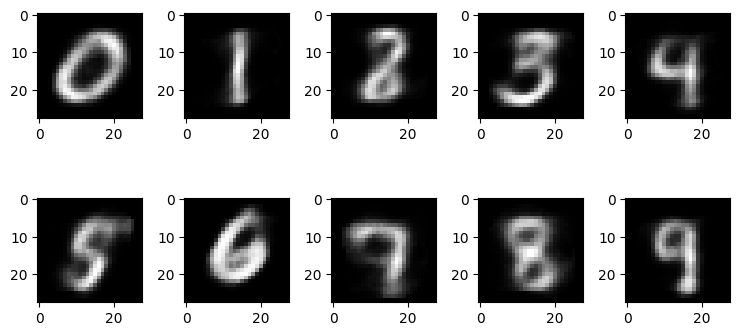

In [18]:
from utils import visualize_out
count = 10
z = torch.randn((count, latent_dim), device=get_device())
cond = torch.nn.functional.one_hot(torch.tensor(range(count)), 10).to(get_device())
out = net.decoder(z, cond)

imgs = out.reshape((count, 28, 28)).cpu().detach().numpy()
visualize_out(imgs)